In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import heapq
from pathlib import Path

sns.set_palette("pastel", 9)
#husl

### Visualization functions

In [13]:
def count_compare_plot(df, column, compare_column, stat="count", rotation=0, order=None):
    plt.figure(figsize=(12,6))
    sns.countplot(df, x=df[column], hue = df[compare_column], palette='Greens', gap=0.05, 
                  stat=stat, order=order)
    plt.title(f'{compare_column} distribution in every {column} class')
    plt.xticks(rotation=rotation)
    plt.legend()
    plt.show()


def count_grouped_plot(df, column, groupby):
    plt.figure(figsize=(12,6))
    mean_values = df.groupby(groupby)[column].mean().reset_index()
    sns.barplot(x=groupby, y=column, data=mean_values, color="#03C04A")

    plt.title(f'Mean {column} for every {groupby} class')
    plt.xticks(rotation=60)
    plt.legend()
    plt.show()

def count_99_grouped(df, value, column, compare_column):
    df = df[[column, compare_column]]
    df_reduced = df[df[column] == value]
    df_reduced = df_reduced.groupby(compare_column).count()
    sns.countplot(df_reduced, x=df_reduced[compare_column])
    
    

#03C04A - parakeet
#03AC13" - shamrock
#028A0F - emerald


In [4]:
file_path = Path('adults_data','adult_cleaned_data.csv')

In [5]:
column_names = ["age","workclass","fnlwgt", "education-num", "marital-status", "occupation", 
                "relationship", "race", "sex", "capital", "hours-per-week", "native-country", "income"]

df = pd.read_csv(file_path, delimiter=',', header=0, names=column_names)

n = len(df)
n_features = len(df.columns) - 2

df.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,native-country,income
0,31-40,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,40,United-States,<=50K
1,41-50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,13,United-States,<=50K
2,31-40,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,40,United-States,<=50K
3,51-60,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,40,United-States,<=50K
4,25-30,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,40,Middle America,<=50K


In [14]:
count_99_grouped(df, 99999, "capital", "occupation")

KeyError: 'occupation'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  object 
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education-num   32561 non-null  int64  
 4   marital-status  32561 non-null  object 
 5   occupation      30718 non-null  object 
 6   relationship    32561 non-null  object 
 7   race            32561 non-null  object 
 8   sex             32561 non-null  object 
 9   capital         32402 non-null  float64
 10  hours-per-week  32561 non-null  int64  
 11  native-country  31864 non-null  object 
 12  income          32561 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 3.2+ MB


In [6]:
df.shape

(32561, 13)

In [7]:
df.nunique()

age                   8
workclass             8
fnlwgt            21648
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital             209
hours-per-week       94
native-country       13
income                2
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital,32402.0,504.499198,2611.892647,-4356.0,0.0,0.0,0.0,41310.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


## NaN visualization

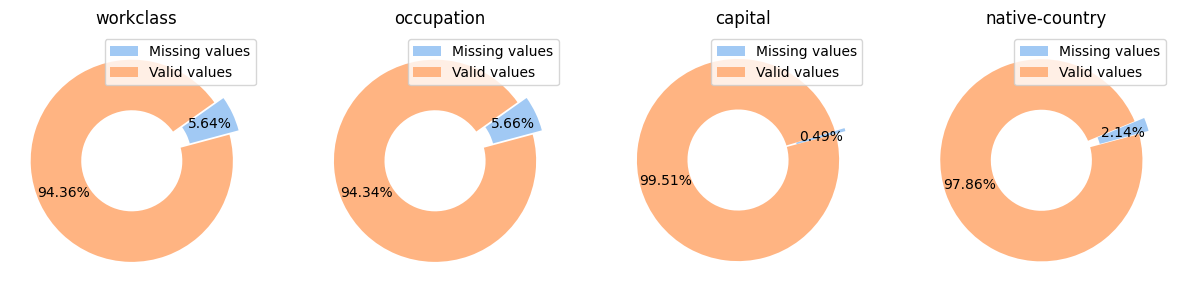

In [9]:
# Amount of missing values
df_missing_values = pd.DataFrame({"Missing values": df.isnull().sum(), "Valid values": df.notnull().sum()})
df_missing_values = df_missing_values[df_missing_values["Missing values"] > 0 ]
df_missing_values = df_missing_values.T



fig, axes = plt.subplots(1, len(df_missing_values.columns), figsize=(15, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(df_missing_values.columns):
    labels = ['Missing values', 'Valid values']
    ax = axes[i]
    ax.pie(df_missing_values[col], autopct='%1.2f%%', wedgeprops=dict(width=0.5), 
           startangle=15, explode=(0.05,0.05), shadow=False, pctdistance=0.75)
    ax.set_title(col)
    ax.legend(labels)

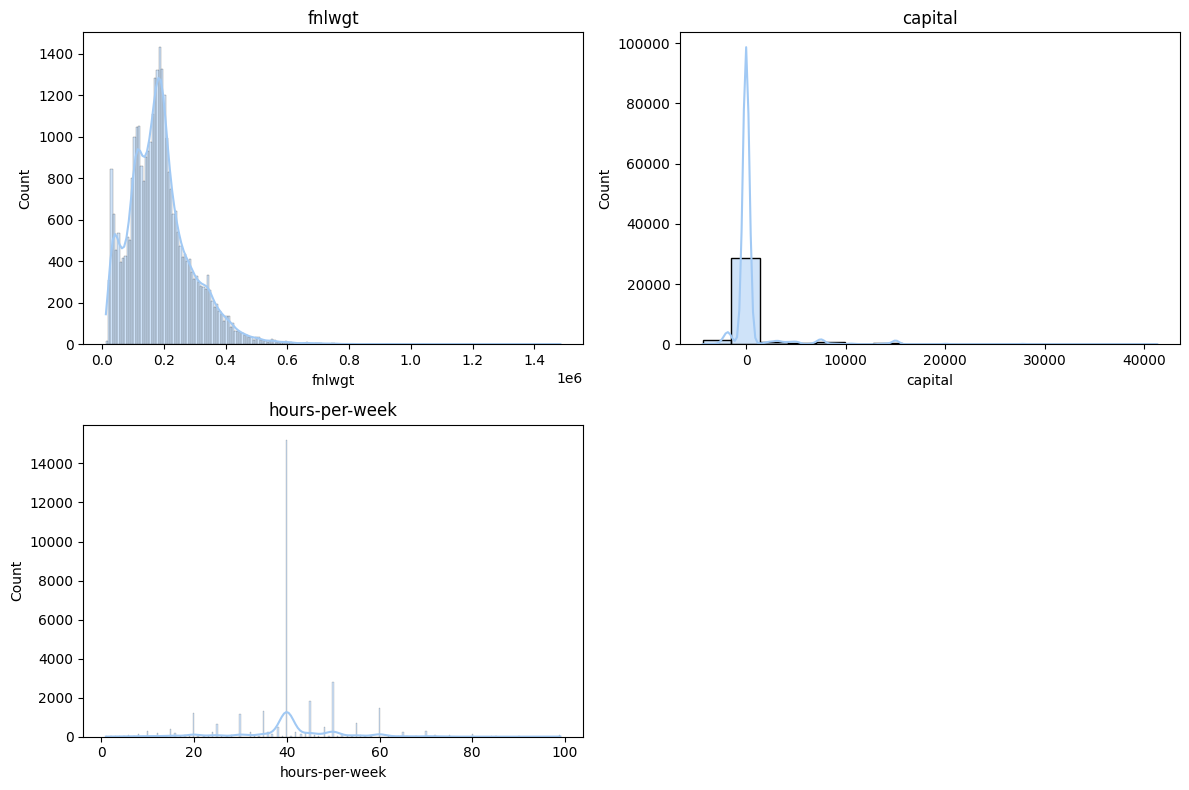

In [10]:
numerical_features = ['fnlwgt', 'capital', 'hours-per-week']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

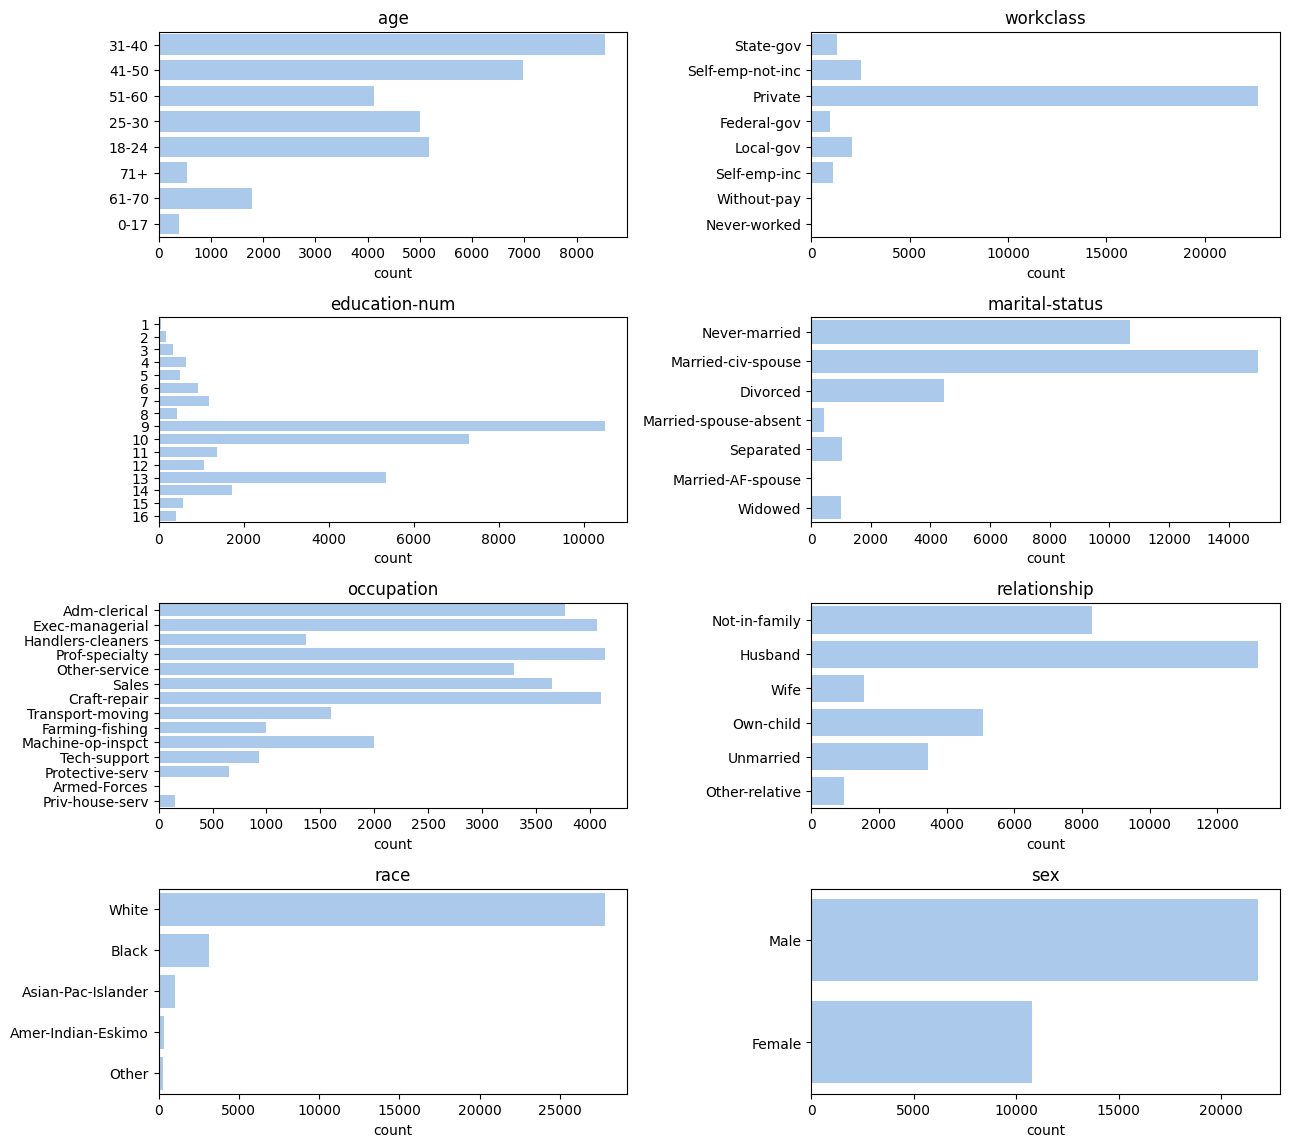

In [11]:
categorical_features = ['age','workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
plt.figure(figsize=(13, 14))
#plots without country
for i, feature in enumerate(categorical_features, 1):
    if i < len(categorical_features):
        plt.subplot(5, 2, i)
        sns.countplot(data=df, y=feature)       # can do stat="percent"
        plt.title(feature)
        plt.ylabel(None)
plt.tight_layout()
plt.show()

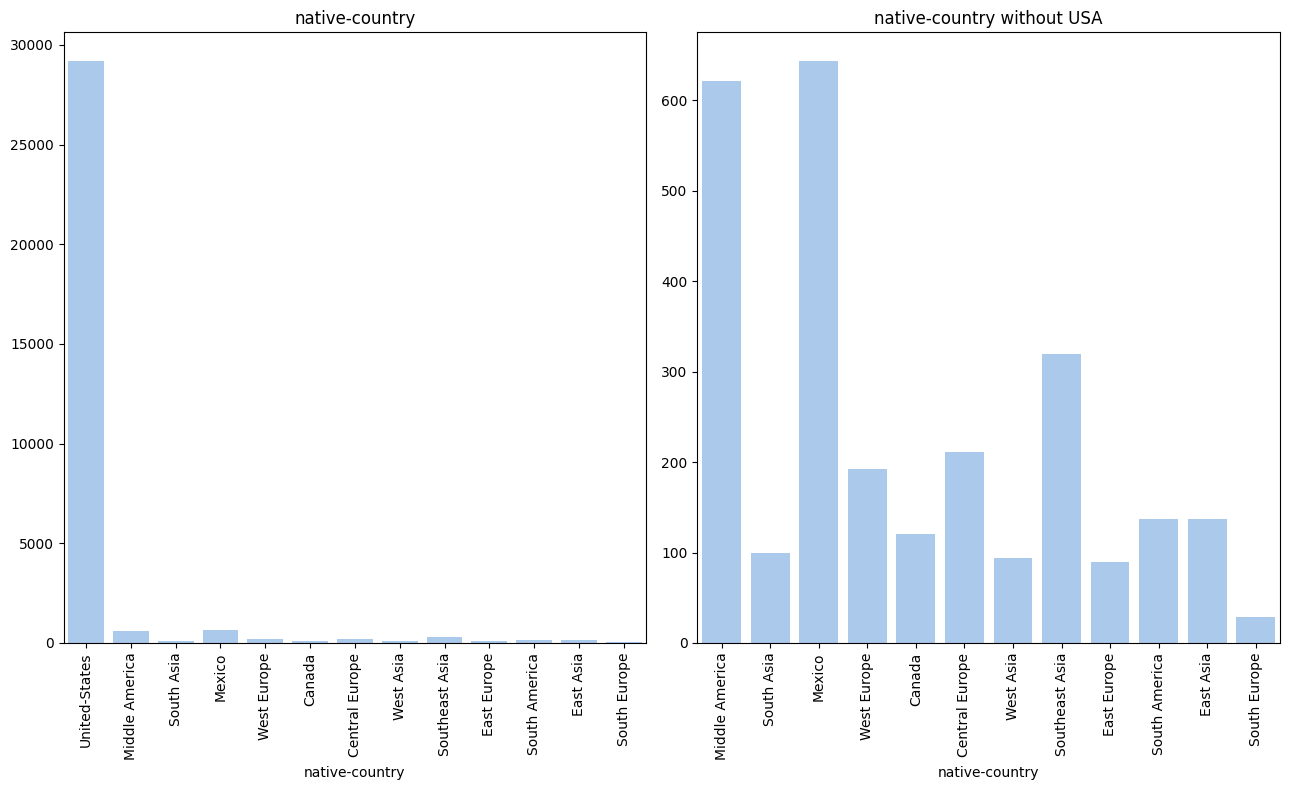

In [12]:
fix, axes = plt.subplots(1, 2, figsize=(13, 8))
for i, usa in enumerate([True, False]):
    if usa:
        plt.subplot(1,2,1)
        sns.countplot(data = df, 
                      x = categorical_features[-1])
        plt.title(categorical_features[-1])
        plt.ylabel(None)
        plt.xticks(rotation=90)
    else:
        plt.subplot(1,2,2)
        sns.countplot(data = df[df['native-country'] != 'United-States'], 
                      x = categorical_features[-1])
        plt.title(categorical_features[-1] + ' without USA')
        plt.ylabel(None)
        plt.xticks(rotation=90)
        
plt.tight_layout()
plt.show()

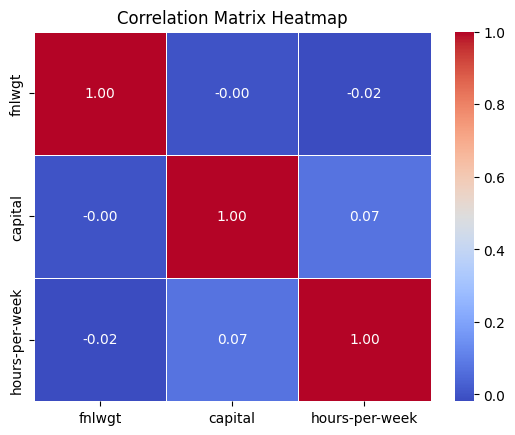

In [13]:
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

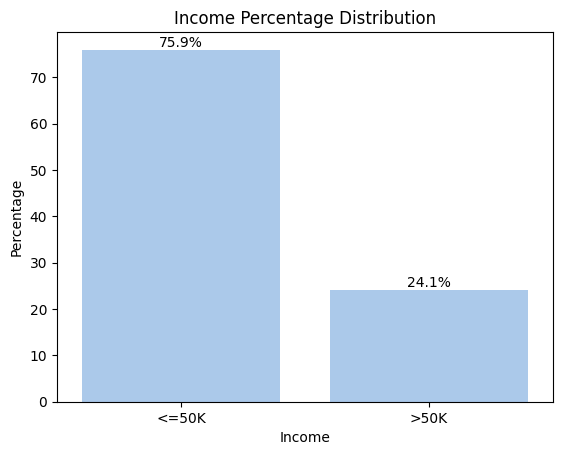

In [14]:
ax = sns.countplot(data=df, x="income", stat="percent")
plt.ylabel("Percentage")
plt.xlabel("Income")
plt.title("Income Percentage Distribution")


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

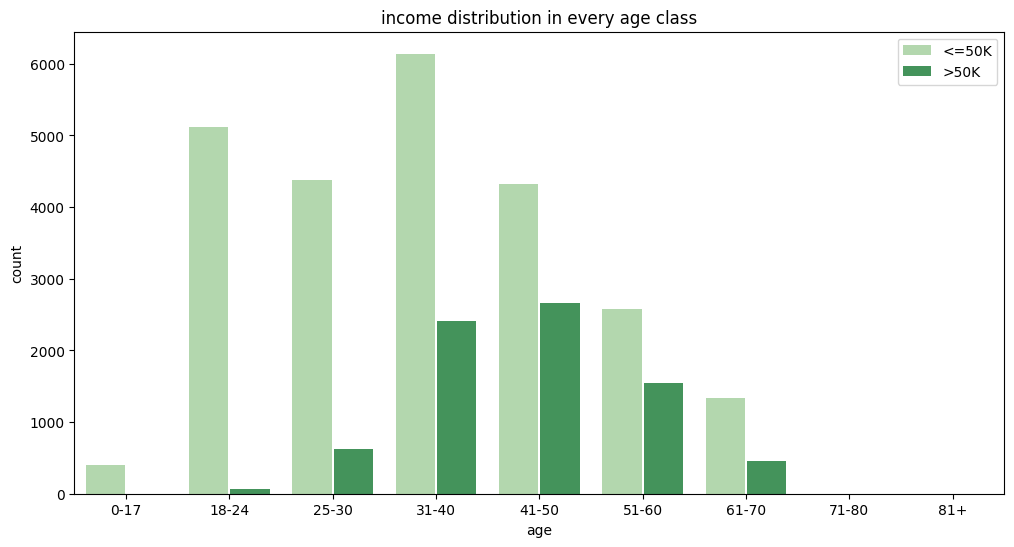

In [28]:
labels_age = ['0-17','18-24','25-30','31-40','41-50','51-60','61-70','71-80','81+']
count_compare_plot(df, column="age", compare_column="income", order=labels_age)

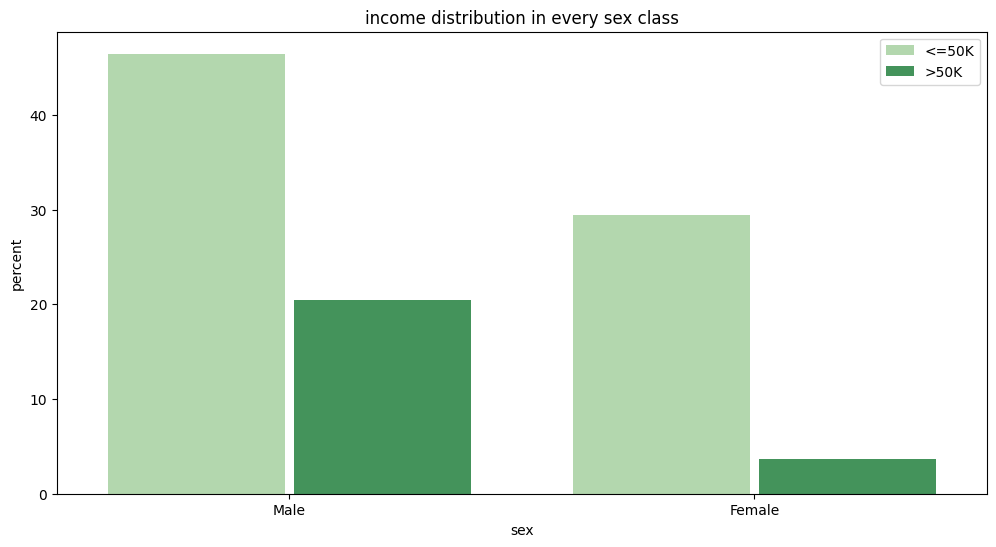

In [29]:
count_compare_plot(df, column="sex", compare_column="income", stat="percent")

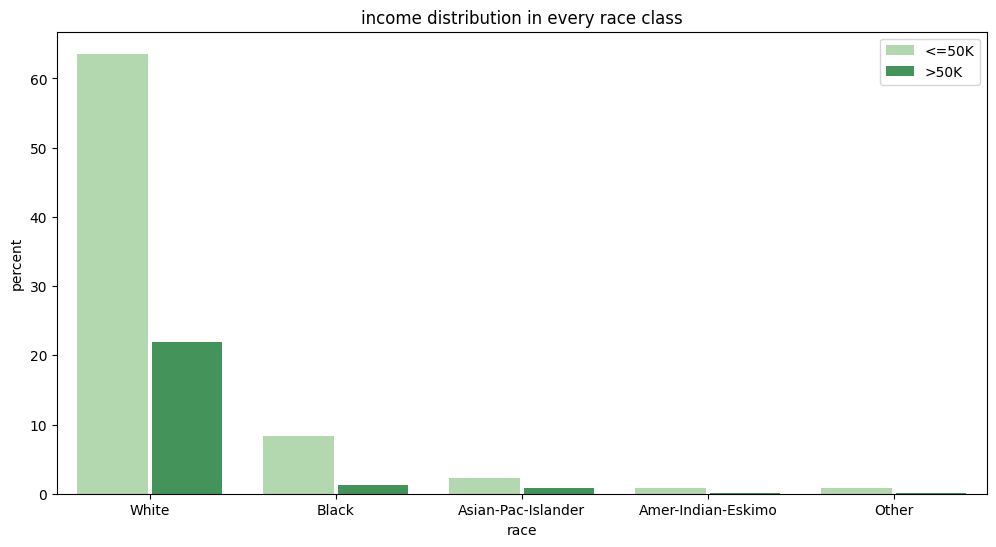

In [30]:
count_compare_plot(df, column="race", compare_column="income", stat="percent")

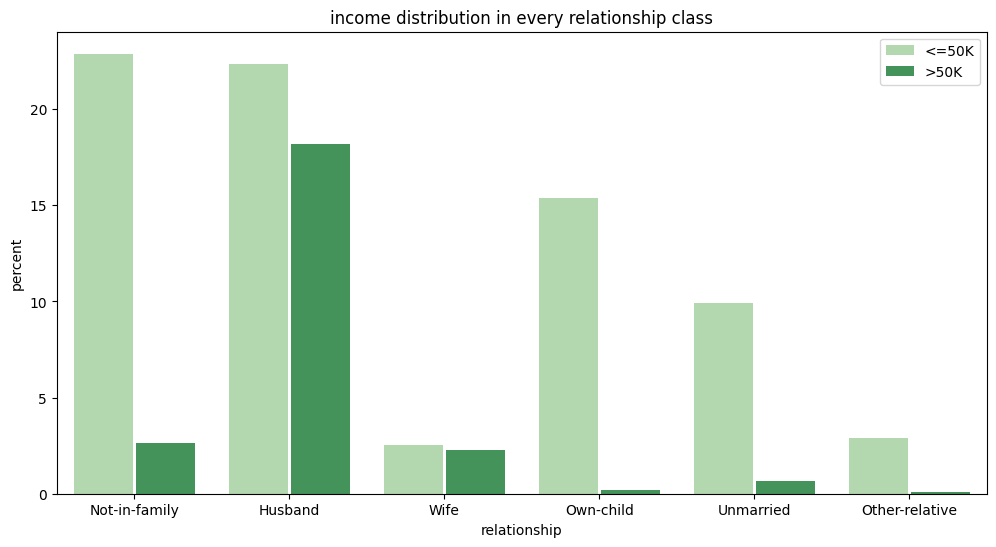

In [31]:
count_compare_plot(df, column="relationship", compare_column="income", stat="percent")

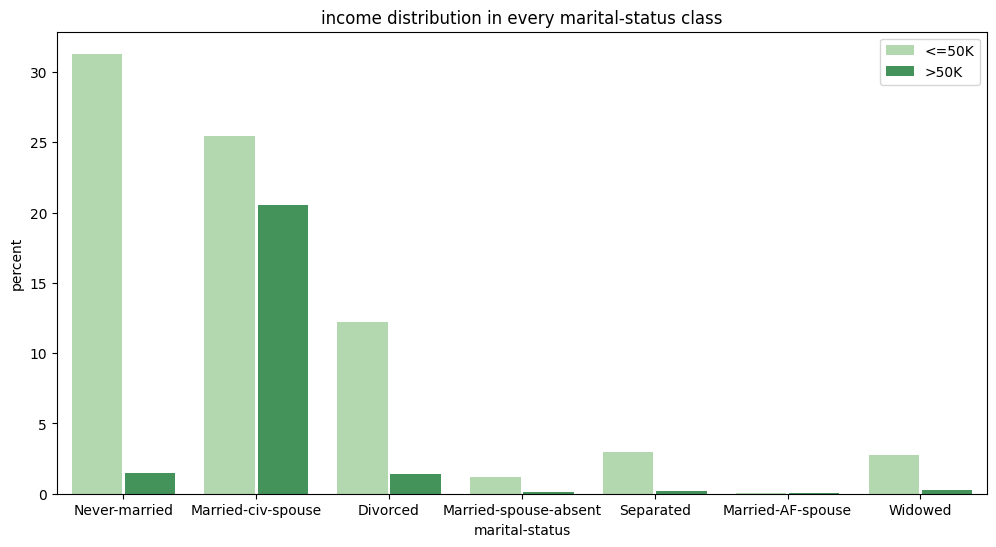

In [32]:
count_compare_plot(df, column="marital-status", compare_column="income", stat="percent")

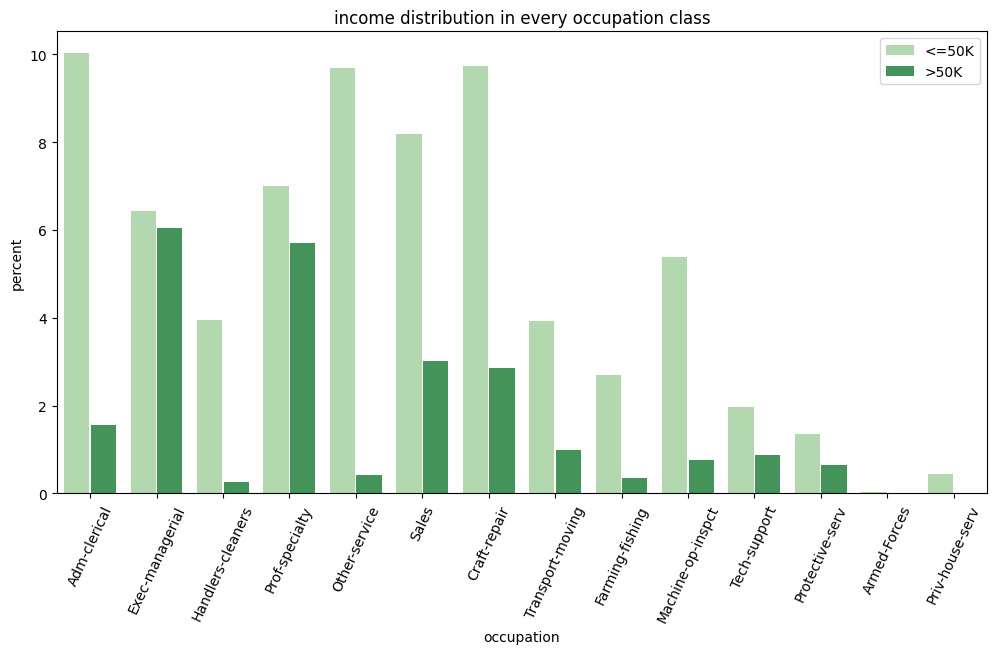

In [33]:
count_compare_plot(df, column="occupation", compare_column="income", stat="percent", rotation=65)

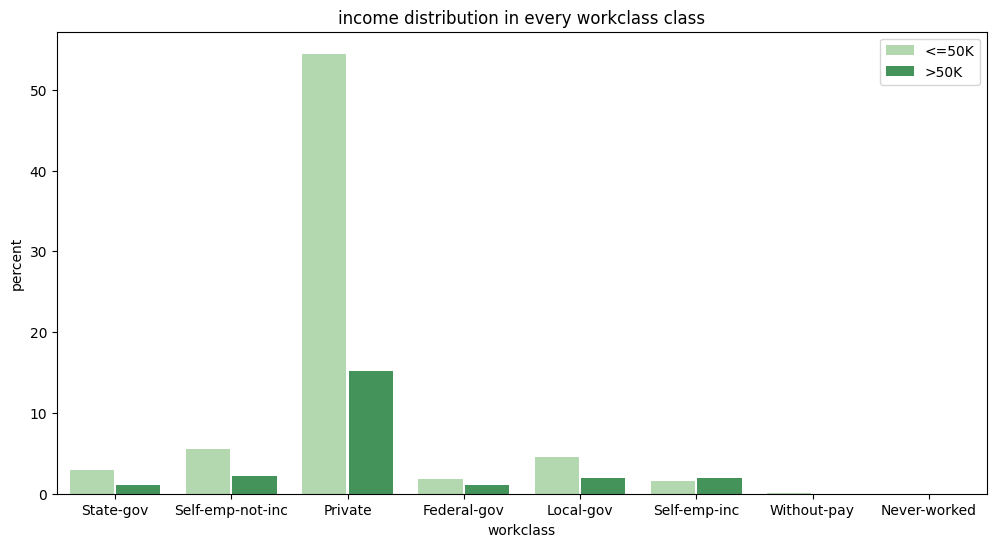

In [34]:
count_compare_plot(df, column="workclass", compare_column="income", stat="percent")

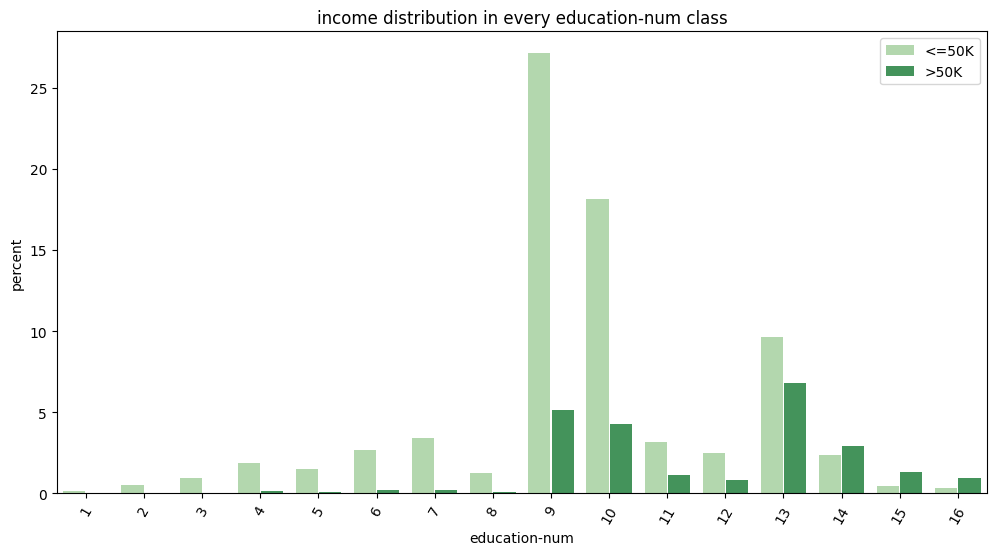

In [35]:
count_compare_plot(df, column="education-num", compare_column="income", stat="percent", rotation=60)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


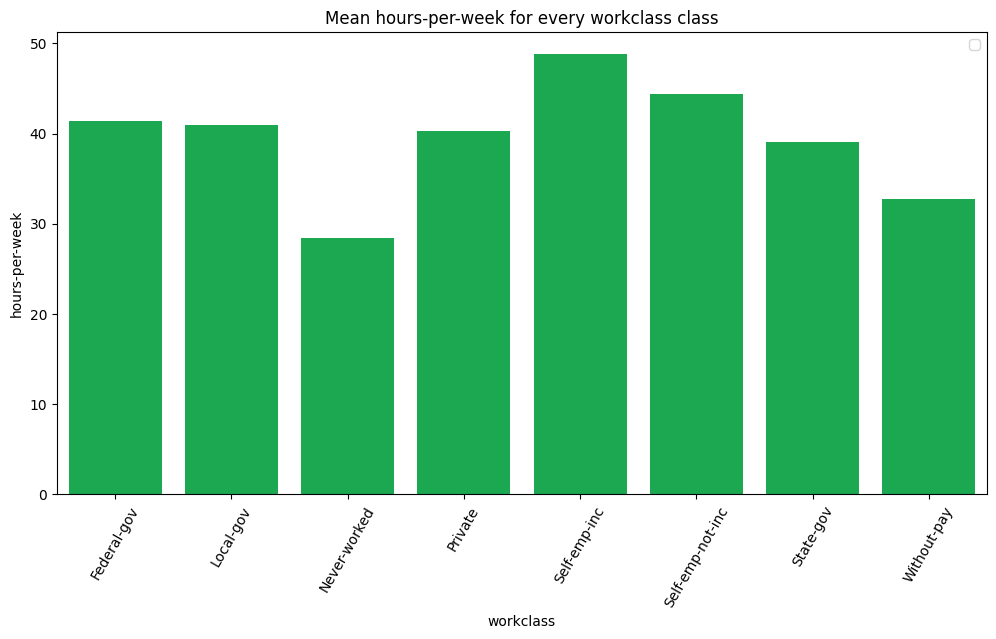

In [54]:
count_grouped_plot(df, "hours-per-week", "workclass")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


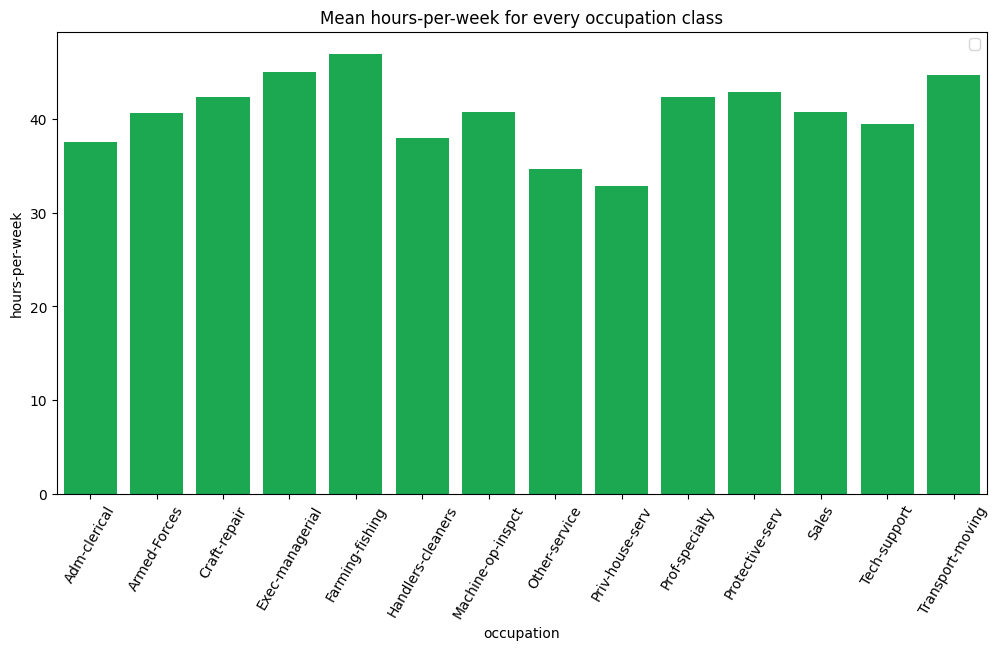

In [55]:
count_grouped_plot(df, "hours-per-week", "occupation")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


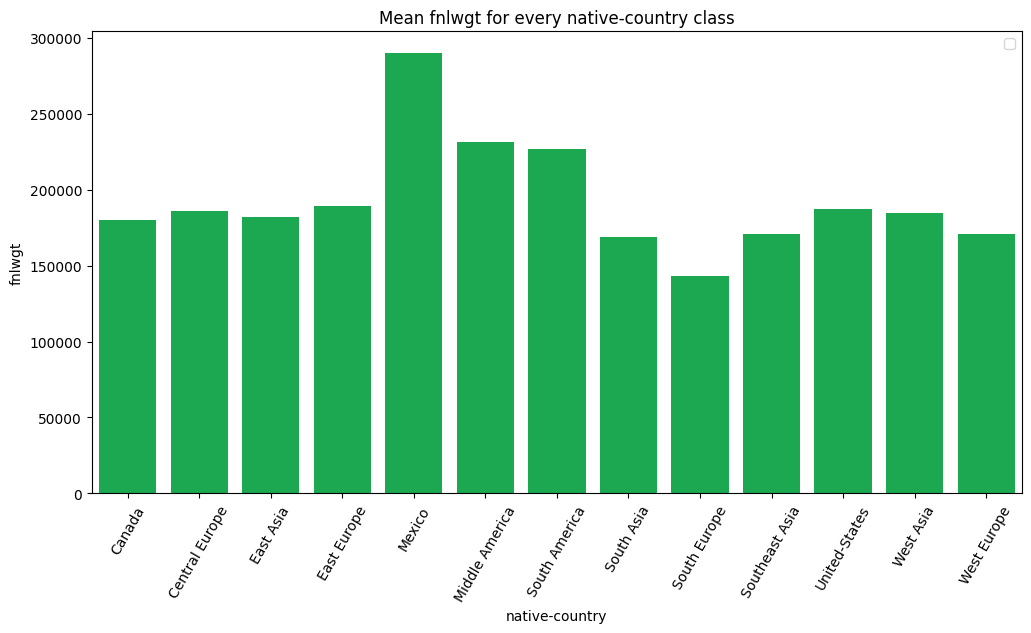

In [56]:
count_grouped_plot(df, "fnlwgt", "native-country")

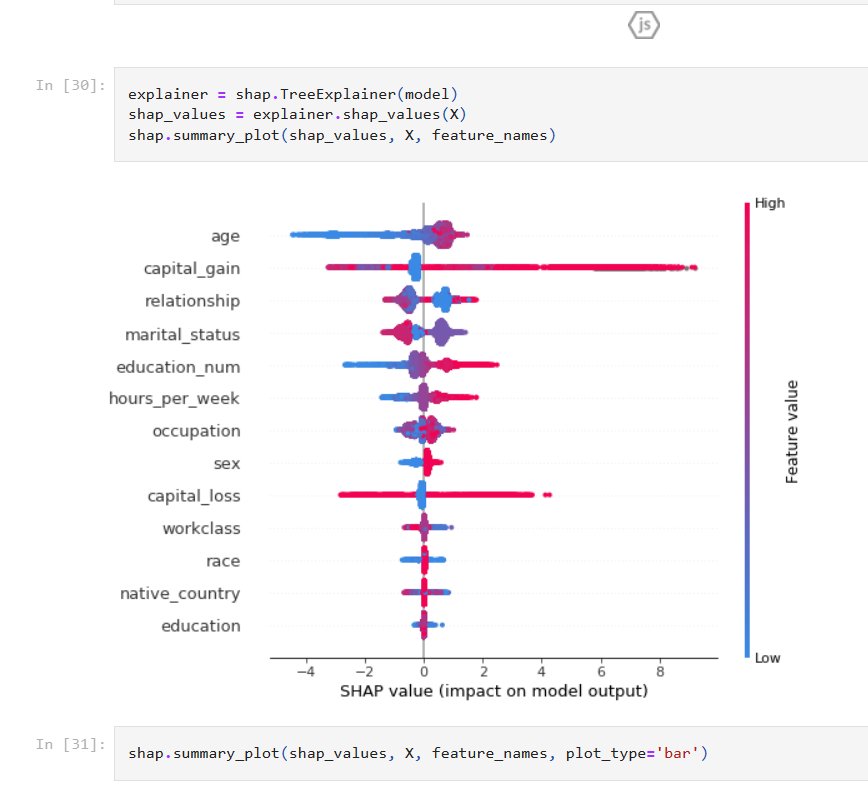